In [1]:
import pandas as pd
from itertools import islice
import seaborn as sns
import matplotlib

In [2]:
url = "/bigdata/jelicicna/output_datasets/distances_table_nextbike_2020-01.csv.gz"
#url_pr = "processed_data_nextbike_2020-06cc.csv"
df = pd.read_csv(url, sep=';', low_memory=False)
#df_pr = pd.read_csv(url, sep=';', low_memory=False)

In [3]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [4]:
pd.set_option('display.max_columns()', None)

#### Function for limiting possible lengths of distances to 2500meters in order to work with one part of data without extreme values

In [5]:
def drop_duplicates(l):
    '''Droping duplicates from a list while maintaining order'''
    seen = set()
    seen_add = seen.add
    return [x for x in l if not (x in seen or seen_add(x))]

In [6]:
def short_list(time):
    return [x for x in sr[time] if x < 2500]

In [7]:
df = df.drop(['bike', 'bike_racks', 'bikes', 'booked_bikes', 'free_racks', 'free_special_racks', 'maintenance', 'number', 
              'place_type', 'rack_locks', 'special_racks', 'spot', 'terminal_type', 'city',
              'country_code', 'company', 'timezone'], axis=1)

df.drop(['index'], axis=1, inplace=True)

In [8]:
df.head()

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
0,50.932058,6.988541,50.936326,6.986125,2020-01-01 02:40:01,2020-01-01 02:46:02,6.0,504.0,26503191,26523894,160.0,NaN,BIKE 22739,2620
1,50.936326,6.986125,50.932037,6.988254,2020-01-01 06:25:02,2020-01-01 06:30:03,5.0,500.0,26523894,26528020,219.0,NaN,BIKE 22739,2613
2,50.932037,6.988254,50.933224,6.982801,2020-01-01 12:56:02,2020-01-01 13:03:01,7.0,404.0,26528020,26534301,386.0,NaN,BIKE 22739,2622
3,50.933224,6.982801,50.933625,6.981179,2020-01-01 15:27:02,2020-01-01 15:31:02,4.0,122.0,26534301,26537369,144.0,NaN,BIKE 22739,2616
4,50.933625,6.981179,50.933253,6.982808,2020-01-01 22:52:02,2020-01-01 22:55:02,3.0,121.0,26537369,26544916,441.0,NaN,BIKE 22739,2604


In [9]:
negative_values = df[df['ride_time'] < 0].index.to_list()
negative_values

[]

In [10]:
#use only if there are values that you need to drop in negative values
#df.drop(negative_values, inplace=True)

In [11]:
out_rides = []
for index, row in df.iterrows():
    if (row['ride_time'] < 2) or (row['ride_time'] >= 700):
        out_rides.append(index)

In [12]:
out_distances_total = []
for index, row in df.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances_total.append(index)

In [13]:
len(df)

64091

In [14]:
len(out_distances_total)

8499

In [15]:
len(out_rides)

6570

In [16]:
out_set = len(set(out_rides + out_distances_total))
out_set

10548

In [17]:
# Function to callculate the intersection of two lists
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [18]:
intersect = intersection(out_rides, out_distances_total)
len(intersect)

4521

In [19]:
df_limit = df.drop(out_rides, axis=0)

In [20]:
df_limit['distance'].value_counts()

8.0       71
12.0      68
10.0      62
19.0      62
13.0      61
18.0      60
16.0      60
14.0      58
9.0       58
15.0      56
28.0      55
20.0      54
24.0      54
17.0      53
21.0      52
11.0      52
7.0       51
22.0      49
6.0       49
5.0       48
26.0      47
25.0      45
731.0     44
586.0     43
30.0      43
848.0     42
463.0     42
684.0     42
23.0      42
4.0       42
          ..
7218.0     1
4538.0     1
6065.0     1
4251.0     1
4513.0     1
5630.0     1
5469.0     1
6137.0     1
7016.0     1
6379.0     1
7645.0     1
5383.0     1
6247.0     1
5935.0     1
5746.0     1
3992.0     1
6263.0     1
7042.0     1
5575.0     1
6623.0     1
7814.0     1
6149.0     1
5404.0     1
5182.0     1
5256.0     1
6022.0     1
3598.0     1
7834.0     1
5267.0     1
8067.0     1
Name: distance, Length: 5730, dtype: int64

In [21]:
out_distances = []
for index, row in df_limit.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances.append(index)

In [22]:
len(out_distances)

3978

In [23]:
len(out_distances + out_rides)

10548

In [24]:
quotient = len(out_distances + out_rides) / len(df)
percent = quotient * 100
print(percent)

16.45784899595887


In [25]:
df_c = df_limit.drop(out_distances, axis=0)
df_c.reset_index(inplace=True)

In [26]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53543 entries, 0 to 53542
Data columns (total 15 columns):
index                   53543 non-null int64
lat_begin               53543 non-null float64
lng_begin               53543 non-null float64
lat_end                 53543 non-null float64
lng_end                 53543 non-null float64
ride_begin              53543 non-null object
ride_end                53543 non-null object
ride_time               53543 non-null float64
distance                53543 non-null float64
uid_begin               53543 non-null int64
uid_end                 53543 non-null int64
standing_before_ride    53543 non-null float64
address                 308 non-null object
name                    53543 non-null object
available_bikes         53543 non-null int64
dtypes: float64(7), int64(4), object(4)
memory usage: 6.1+ MB


In [27]:
df_c['distance'].value_counts()

731.0     44
586.0     43
684.0     42
848.0     42
463.0     42
530.0     40
551.0     40
873.0     40
597.0     40
545.0     40
411.0     39
399.0     39
779.0     39
723.0     38
889.0     38
939.0     38
405.0     38
938.0     38
773.0     38
664.0     38
423.0     38
811.0     37
867.0     37
778.0     37
440.0     37
583.0     37
701.0     37
888.0     37
446.0     37
408.0     37
          ..
4753.0     1
8067.0     1
7016.0     1
3134.0     1
7925.0     1
6729.0     1
5133.0     1
5354.0     1
5328.0     1
7218.0     1
6480.0     1
5744.0     1
5693.0     1
8459.0     1
4507.0     1
5704.0     1
5662.0     1
5575.0     1
5877.0     1
7814.0     1
4978.0     1
6590.0     1
4049.0     1
5273.0     1
5338.0     1
5544.0     1
6022.0     1
3598.0     1
5728.0     1
4330.0     1
Name: distance, Length: 5519, dtype: int64

In [28]:
df_c['ride_time'].value_counts()

8.0      2734
7.0      2668
9.0      2600
10.0     2537
11.0     2350
6.0      2177
12.0     2160
13.0     2044
14.0     1958
15.0     1827
16.0     1695
17.0     1581
18.0     1479
19.0     1382
5.0      1369
20.0     1338
21.0     1171
22.0     1089
23.0      971
24.0      960
25.0      841
26.0      807
27.0      770
28.0      675
29.0      640
30.0      592
32.0      534
31.0      528
4.0       441
33.0      407
         ... 
676.0       1
325.0       1
458.0       1
643.0       1
546.0       1
585.0       1
501.0       1
692.0       1
697.0       1
473.0       1
449.0       1
466.0       1
477.0       1
404.0       1
545.0       1
491.0       1
448.0       1
419.0       1
604.0       1
648.0       1
615.0       1
629.0       1
662.0       1
515.0       1
522.0       1
557.0       1
610.0       1
429.0       1
641.0       1
519.0       1
Name: ride_time, Length: 615, dtype: int64

In [29]:
ind = []
for index, row in df_c.iterrows():
    if row['distance']<300:
        ind.append(index)

In [30]:
ind

[26,
 118,
 240,
 253,
 280,
 292,
 309,
 332,
 344,
 345,
 376,
 396,
 416,
 465,
 496,
 503,
 559,
 569,
 630,
 634,
 644,
 676,
 742,
 784,
 808,
 858,
 877,
 883,
 885,
 886,
 907,
 940,
 963,
 972,
 1008,
 1037,
 1076,
 1114,
 1279,
 1280,
 1281,
 1282,
 1287,
 1333,
 1451,
 1470,
 1471,
 1472,
 1540,
 1555,
 1556,
 1598,
 1604,
 1632,
 1663,
 1676,
 1681,
 1733,
 1781,
 1812,
 1813,
 1820,
 1824,
 1837,
 1856,
 1866,
 1878,
 1892,
 1953,
 1974,
 1992,
 2011,
 2043,
 2087,
 2100,
 2189,
 2254,
 2282,
 2318,
 2369,
 2531,
 2555,
 2567,
 2568,
 2577,
 2584,
 2607,
 2646,
 2656,
 2663,
 2711,
 2839,
 2842,
 2864,
 2936,
 2961,
 2971,
 3011,
 3041,
 3085,
 3103,
 3133,
 3140,
 3178,
 3187,
 3203,
 3224,
 3281,
 3311,
 3365,
 3366,
 3367,
 3383,
 3389,
 3402,
 3436,
 3464,
 3485,
 3588,
 3650,
 3681,
 3682,
 3745,
 3788,
 3793,
 3803,
 3837,
 3854,
 3936,
 3938,
 3943,
 4052,
 4058,
 4068,
 4071,
 4089,
 4135,
 4199,
 4218,
 4268,
 4462,
 4464,
 4490,
 4512,
 4582,
 4611,
 4779,
 4908,

In [31]:
df_c.iloc[ind]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
26,42,50.966542,6.909457,50.966549,6.905460,2020-01-31 11:37:02,2020-01-31 11:41:02,4.0,280.0,27423763,27435883,920.0,NaN,BIKE 22739,2610
118,148,50.920890,6.957166,50.921240,6.953615,2020-01-03 17:25:02,2020-01-03 17:31:02,6.0,252.0,26589665,26591255,56.0,NaN,BIKE 22915,2595
240,296,50.948385,6.956671,50.949403,6.959222,2020-01-21 21:22:02,2020-01-21 21:27:02,5.0,212.0,27186322,27186576,10.0,NaN,BIKE 21579,2551
253,311,50.961599,6.997406,50.959822,6.996182,2020-01-31 10:50:02,2020-01-31 11:50:02,60.0,215.0,27401417,27434794,2131.0,NaN,BIKE 21579,2610
280,341,50.943113,6.981027,50.942252,6.977167,2020-01-12 11:20:01,2020-01-12 11:50:01,30.0,287.0,26855390,26857840,125.0,NaN,BIKE 22396,2514
292,355,50.933516,6.921779,50.931351,6.921818,2020-01-20 14:12:02,2020-01-20 14:18:02,6.0,241.0,27138323,27138860,9.0,NaN,BIKE 22396,2529
309,373,50.956195,6.958975,50.956992,6.955971,2020-01-28 06:40:02,2020-01-28 06:49:02,9.0,228.0,27351420,27355305,508.0,NaN,BIKE 22396,2623
332,404,50.973696,6.943725,50.975146,6.947043,2020-01-17 12:00:02,2020-01-17 12:20:02,20.0,283.0,27040445,27041665,11.0,NaN,BIKE 21118,2528
344,424,50.944305,7.025142,50.943426,7.027857,2020-01-16 13:23:02,2020-01-16 13:28:02,5.0,214.0,26985910,27007253,979.0,NaN,BIKE 22040,2524
345,425,50.943426,7.027857,50.941319,7.026627,2020-01-25 19:17:02,2020-01-25 19:21:03,4.0,250.0,27007253,27303400,13309.0,NaN,BIKE 22040,2544


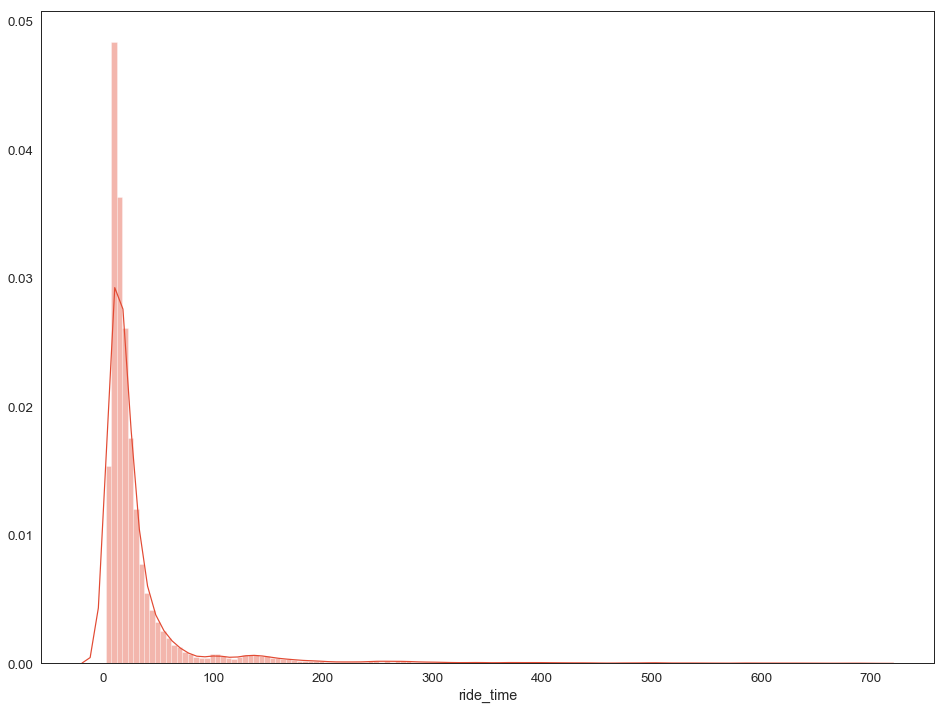

In [32]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['ride_time'], bins = 140)

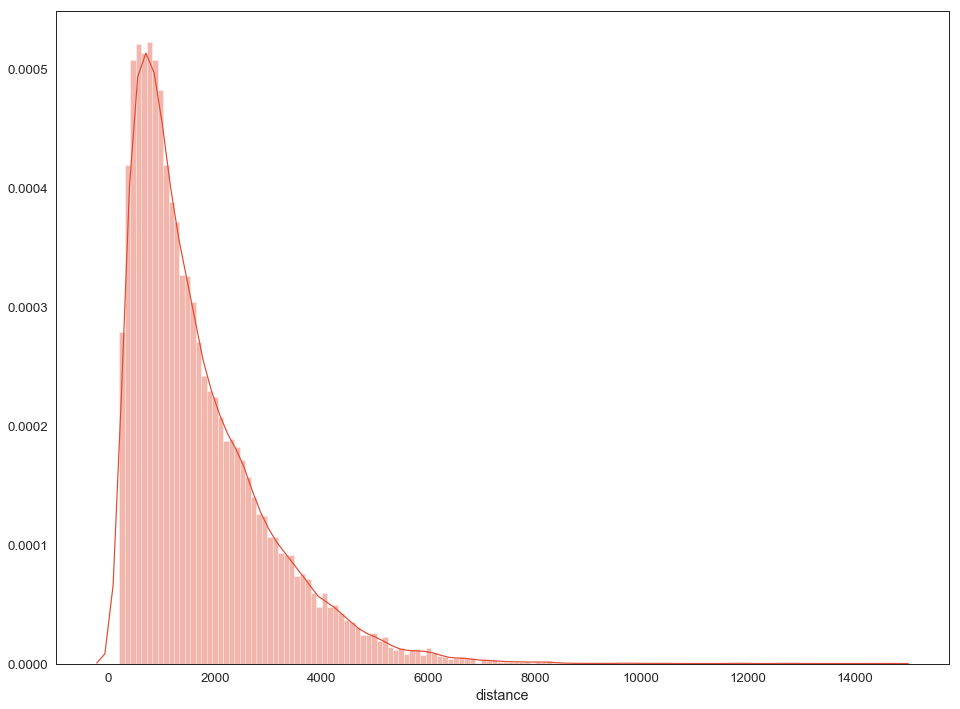

In [33]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['distance'], bins = 140)

In [34]:
rows_with_nan = []
for index, row in df_c.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

In [35]:
df_adr = df_c.drop(rows_with_nan, axis=0)

In [36]:
df_adr

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
216,264,50.919418,6.959776,50.944125,6.959246,2020-01-14 17:33:02,2020-01-14 18:10:03,37.0,2748.0,26937609,26942141,18.0,Bonner Str. 28,BIKE 21579,2480
312,378,50.918073,6.960369,50.915496,6.970114,2020-01-30 13:00:02,2020-01-30 13:29:02,29.0,741.0,27409728,27413034,102.0,Bonner Str. 45,BIKE 22396,2611
396,486,50.942163,6.957415,50.943219,6.953894,2020-01-13 06:32:02,2020-01-13 06:38:02,6.0,273.0,26878086,26878795,33.0,Köln - Trankgasse 11,BIKE 21822,2558
459,558,50.941769,6.957032,50.936790,6.947512,2020-01-15 07:27:02,2020-01-15 07:59:01,32.0,867.0,26939877,26956992,78.0,trankgasse,BIKE 21570,2521
577,694,50.990176,6.961595,50.943563,6.962405,2020-01-10 17:55:02,2020-01-10 18:19:02,24.0,5185.0,26706552,26807462,4255.0,Sebastianstraße 186,BIKE 21729,2577
621,750,50.961499,6.902472,50.955227,6.908167,2020-01-31 17:42:02,2020-01-31 17:59:02,17.0,804.0,27404973,27447504,1202.0,Johann-Brinck-Straße 7,BIKE 21729,2607
1140,1381,50.936493,6.957709,50.948781,6.932093,2020-01-09 19:58:02,2020-01-09 20:14:02,16.0,2256.0,26771265,26773351,27.0,gürzenich straße,BIKE 22048,2515
1301,1587,50.923942,6.980476,50.906123,6.978011,2020-01-28 16:45:02,2020-01-28 17:02:02,17.0,1990.0,27367990,27369022,16.0,haltestelle siegburger straße,BIKE 22151,2613
1464,1780,50.958850,6.949425,50.939852,6.960408,2020-01-21 09:40:02,2020-01-21 09:55:02,15.0,2249.0,27140122,27165342,600.0,körner straße 23,BIKE 21374,2551
1564,1886,50.938854,7.009006,50.945645,7.020989,2020-01-14 22:01:02,2020-01-14 22:10:03,9.0,1130.0,26932513,26949090,316.0,Kalker Kapelle,BIKE 22325,2487


In [37]:
previous_index = 0
previous_distance = df_c.iloc[0]['distance']
suspicious_return_trips = []
for index,row in islice(df_c.iterrows(), 1, None):
    if (row['distance'] == previous_distance):
        suspicious_return_trips.append(previous_index)
        suspicious_return_trips.append(index)
        
    previous_index = index
    previous_distance = row['distance']

In [38]:
df_c.iloc[suspicious_return_trips]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
994,1204,50.919282,6.956460,50.935846,6.984152,2020-01-14 13:46:02,2020-01-14 14:22:03,36.0,2677.0,26917953,26926347,256.0,NaN,BIKE 22211,2531
995,1205,50.935846,6.984152,50.919350,6.956348,2020-01-15 08:54:03,2020-01-15 09:29:02,35.0,2677.0,26926347,26961268,1112.0,NaN,BIKE 22211,2512
1557,1878,50.928729,6.992510,50.936508,6.985893,2020-01-13 10:13:02,2020-01-13 11:52:03,99.0,982.0,26871814,26885213,751.0,NaN,BIKE 22325,2544
1558,1880,50.935742,6.986667,50.936750,7.000592,2020-01-13 12:53:02,2020-01-13 13:01:03,8.0,982.0,26888800,26889376,14.0,NaN,BIKE 22325,2501
1722,2076,50.961623,6.998365,50.962884,7.006066,2020-01-06 06:52:02,2020-01-06 07:04:02,12.0,557.0,26645179,26655576,723.0,NaN,BIKE 21979,2616
1723,2077,50.962884,7.006066,50.961685,6.998344,2020-01-06 07:05:01,2020-01-06 07:16:03,11.0,557.0,26655576,26655867,1.0,NaN,BIKE 21979,2622
3688,4452,50.916685,6.941172,50.914913,6.944710,2020-01-26 20:48:02,2020-01-26 20:53:02,5.0,317.0,27325038,27326609,92.0,NaN,BIKE 21295,2604
3689,4453,50.914913,6.944710,50.916873,6.941432,2020-01-27 07:30:03,2020-01-27 07:57:02,27.0,317.0,27326609,27331950,637.0,NaN,BIKE 21295,2592
4358,5238,50.980007,6.963805,50.974364,6.959747,2020-01-08 19:44:02,2020-01-08 19:49:02,5.0,689.0,26732542,26740307,239.0,NaN,BIKE 22423,2539
4359,5239,50.974364,6.959747,50.980006,6.963799,2020-01-08 20:10:02,2020-01-08 20:21:01,11.0,689.0,26740307,26741161,21.0,NaN,BIKE 22423,2553


In [39]:
def cal_distance_in_meters(speed, time):
    return (speed * round((time/60),1))*1000;

In [40]:
def cal_dis(speed, time):
    print(" Time(hr) :", time) ;
    print(" Speed(km / hr) :", speed);
    return speed * time;

print(" The calculated Distance(km) :",
                   cal_dis(20, 0.3));

 Time(hr) : 0.3
 Speed(km / hr) : 20
 The calculated Distance(km) : 6.0


In [41]:
calculated_distances = []
for row,col in df_c.iterrows():
    recorded_distance = df_c['distance'][row]
    duration = df_c['ride_time'][row]
    
    calculated_distance = cal_distance_in_meters(25, duration)
    calculated_distances.append(calculated_distance)

In [42]:
for d in range(len(calculated_distances)):
    calculated_distances[d] = round(calculated_distances[d] + 1500, 1)

In [43]:
df_c['calculated_distance'] = calculated_distances

In [44]:
unmatched_distances = []
for index, row in df_c.iterrows():
    if df_c['distance'][index] > df_c['calculated_distance'][index]:
        unmatched_distances.append(index)

In [45]:
df_c.iloc[unmatched_distances]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes,calculated_distance
3951,4781,50.960340,7.001228,50.974520,7.010581,2020-01-15 12:39:03,2020-01-15 12:42:02,3.0,1708.0,26966989,26967162,3.0,NaN,BIKE 21994,2487,1500.0
8403,10103,50.971977,7.006857,50.973480,6.948899,2020-01-13 11:35:02,2020-01-13 11:39:02,4.0,4063.0,26886677,26887098,12.0,NaN,BIKE 21267,2512,4000.0
10214,12231,50.865047,6.887681,50.904112,6.920972,2020-01-15 21:32:02,2020-01-15 21:37:02,5.0,4933.0,26986382,26986598,6.0,NaN,BIKE 22720,2523,4000.0
11290,13488,50.939275,6.923550,50.895275,7.057621,2020-01-26 13:19:02,2020-01-26 13:39:02,20.0,10599.0,27308006,27317976,773.0,Köln - Haselbergstr. 8,BIKE 22448,2610,9000.0
16739,19887,50.903257,6.981604,50.940410,6.974298,2020-01-21 17:33:02,2020-01-21 17:37:02,4.0,4164.0,27179281,27180156,18.0,NaN,BIKE 21572,2526,4000.0
19242,22931,50.939199,7.000964,50.951567,7.014077,2020-01-05 18:37:02,2020-01-05 18:40:02,3.0,1654.0,26594886,26644984,2793.0,NaN,BIKE 22705,2587,1500.0
19995,23797,50.916132,6.970284,50.956555,6.962266,2020-01-15 16:59:02,2020-01-15 17:03:02,4.0,4531.0,26977648,26978361,12.0,NaN,BIKE 22923,2504,4000.0
20016,23823,50.954136,6.958455,50.967522,7.003194,2020-01-29 18:40:02,2020-01-29 18:43:02,3.0,3470.0,27310431,27396705,5225.0,NaN,BIKE 22923,2613,1500.0
23057,27434,50.889140,7.074057,50.912064,6.961668,2020-01-23 21:20:02,2020-01-23 21:28:01,8.0,8286.0,27212455,27253419,1715.0,Bonner Str. 58,BIKE 21183,2559,4000.0
26170,31235,50.943847,6.958929,50.907687,6.961128,2020-01-12 19:46:02,2020-01-12 19:50:01,4.0,4025.0,26845868,26869550,1219.0,NaN,BIKE 22176,2500,4000.0


In [46]:
len(unmatched_distances)

16

In [47]:
for i in unmatched_distances:
    if i in df_c.index.values:
        df_c.drop(i, inplace=True)

In [48]:
df_c.reset_index(inplace=True)

In [49]:
df_c['address'].value_counts(dropna=False)

NaN                                       53223
venloer straße                                2
Köln Hauptbahnhof                             2
Stolberger Str. 90                            1
Barthelstraße 6                               1
Messepl                                       1
Hellersbergstraße 11, 41460 Neuss             1
Habichtstraße 26                              1
Bayenthalgürtel 45, 50968 Köln                1
Wiener Platz 2                                1
Siegburger Straße 215, Köln                   1
haltestelle siegburger straße                 1
Goltsteinstraße 114, Köln                     1
Weilburger Str. 2                             1
Cäsarstraße 23                                1
Vogelsanger Str. 128                          1
sachsenring 67                                1
Sebastianstraße 186                           1
Köln -  Aachener Str. 702                     1
Justinianstraße 16                            1
Weißhausstraße 20-22, 50939 Köln        

In [50]:
df_c.rename(columns={"index": "old_index"}, inplace=True)
df_c.drop(['level_0', 'address'], axis=1, inplace=True)

In [51]:
df_c.to_csv('/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2020-01.csv', sep=';', index=False) 

In [52]:
len(df_c)

53527